## Let's Work on our Betting Strategy

In [1]:
import pandas as pd
odds = pd.read_csv('betting_odds', index_col=0)
odds

,teams,scores,opener,BET365
0,Paris Saint Germain,1,-110.0,200.0
1,Monaco,3,275.0,137.0
2,Draw,,260.0,230.0
3,Marseille,2,-133.0,-150.0
4,Clermont Foot,0,375.0,450.0
5,Draw,,250.0,250.0


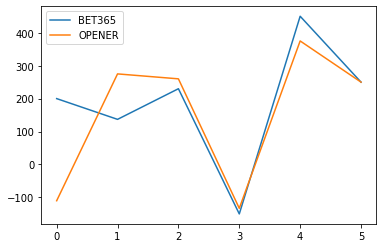

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.plot(odds.BET365, label='BET365')
plt.plot(odds.opener, label='OPENER')
plt.legend(loc="upper left")

<AxesSubplot:xlabel='scores', ylabel='opener'>

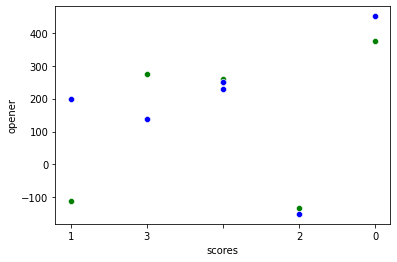

In [3]:
x_col= odds.BET365
y_col = odds.scores

x1_col= odds.opener
y1_col = odds.scores

sns.scatterplot(y=x1_col,x=y1_col,data=odds.BET365,color='green')
sns.scatterplot(y=x_col,x=y_col,data=odds.BET365,color='blue')

<AxesSubplot:xlabel='scores', ylabel='opener'>

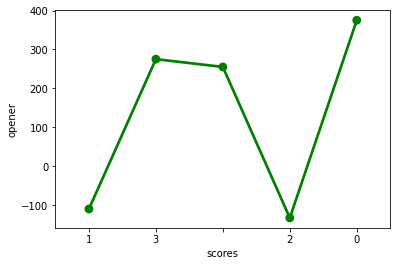

In [4]:
x_col= odds.opener
y_col = odds.scores

# sns.pointplot(odds.BET365)
sns.pointplot(y=x_col,x=y_col,data=odds.BET365,color='green')

In [5]:
# import socket
# fimport socks
import requests
from bs4 import BeautifulSoup
import datetime
from datetime import date
import time
from pandas import DataFrame
import os

# def connectTor():
#   ## Connect to Tor for privacy purposes
#      socks.setdefaultproxy(socks.PROXY_TYPE_SOCKS5, '127.0.0.1', 9150, True)
#      socket.socket = socks.socksocket
#      print "connected to Tor!"



In [6]:
url = 'https://www.sportsbookreview.com/betting-odds/nba-basketball/money-line/full-game/?date=2023-02-15'
raw_data = requests.get(url)
soup_big = BeautifulSoup(raw_data.text, 'html.parser')
soup = soup_big.find_all('div', id="tbody-nba")

In [7]:
def soup_url(type_of_line, tdate = str(date.today())):
## get html code for odds based on desired line type and date
    if type_of_line == 'Spreads':
        url_addon = ''
    elif type_of_line == 'ML':
        url_addon = 'money-line/full-game/'
    elif type_of_line == 'Totals':
        url_addon = 'totals/'
    # elif type_of_line == '1H':
    #     url_addon = '1st-half/'
    # elif type_of_line == '1HRL':
        # url_addon = 'pointspread/1st-half/'
    # elif type_of_line == '1Htotal':
        # url_addon = 'totals/1st-half/'
    else:
        print("Wrong url_addon")
    url = 'https://www.sportsbookreview.com/betting-odds/nba-basketball/' + url_addon + '?date=2023-02-15'
    print(url)
    # url = 'https://www.sportsbookreview.com/betting-odds/nba-basketball/' + url_addon + '?date=' + tdate

    raw_data = requests.get(url)
    soup_big = BeautifulSoup(raw_data.text, 'html.parser')
    soup = soup_big.find_all('div', id="tbody-nba")
    
    # If there are no games that day, then soup is an empty list
    if soup:
        soup = soup[0]
    else:
        print("No games found on {}".format(tdate))

    timestamp = time.strftime("%H:%M:%S")
    return soup, timestamp

# soup_url('ML')
soup = soup[0]
soup_ml, time_ml = soup_url('ML', "2023-02-14")

https://www.sportsbookreview.com/betting-odds/nba-basketball/money-line/full-game/?date=2023-02-15


In [90]:
def parse_and_write_data(soup, date, time, not_ML = True):
    df = DataFrame(columns=('key','date','time',
                            'team', 'opp_team', 'score'))
    
    counter = 0
    number_of_games = len(soup.find_all('div', attrs ={'class':"GameRows_containerTable__YoLW7"}))
    
    for i in range(0, number_of_games):
        H = []
        A = []
        
        print(str(i+1)+'/'+str(number_of_games))
            
        ## Gather all useful data from unique books
        score_data = soup.find_all('div', attrs={'class':"GameRows_scores__YkN24"})
        # score_data has one row per team per game
        score_A = score_data[i*2].get_text()
        score_H = score_data[i*2+1].get_text()
        
        info_A_raw = soup.find_all('div', attrs = {'class':"GameRows_bettingOptionContainer__0VTj_"})[i]
        info_A = info_A_raw.find_all('span', attrs={'class':'GameRows_participantBox__0WCRz'})[0].get_text().strip()
        team_A = info_A
        info_H_raw = soup.find_all('div', attrs = {'class':"GameRows_bettingOptionContainer__0VTj_"})[i]
        info_H = info_H_raw.find_all('span', attrs={'class':'GameRows_participantBox__0WCRz'})[1].get_text().strip()
        team_H = info_H
    
        if team_H ==   'Detroit':
            team_H =   'Detroit'
        elif team_H == 'Indiana':
            team_H =   'Indiana'
        elif team_H == 'Brooklyn':
            team_H =   'Brooklyn'
        elif team_H == 'L.A. Lakers':
            team_H =   'L.A. Lakers'
        elif team_H == 'Washington':
            team_H =   'Washington'
        elif team_H == 'Miami':
            team_H =   'Miami'
        elif team_H == 'Minnesota':
            team_H =   'Minnesota'
        elif team_H == 'Chicago':
            team_H =   'Chicago'
        elif team_H == 'Oklahoma City':
            team_H =   'Oklahoma City'
        if team_A ==   'New Orleans':
            team_A =   'New Orleans'
        elif team_A == 'Houston':
            team_A =   'Houston'
        elif team_A == 'Dallas':
            team_A =   'Dallas'
        elif team_A == 'Cleveland':
            team_A =   'Cleveland'
        elif team_A == 'L.A. Clippers':
            team_A =   'L.A. Clippers'
        elif team_A == 'Golden State':
            team_A =   'Golden State'
        elif team_A == 'Denver':
            team_A =   'Denver'
        elif team_A == 'Boston':
            team_A =   'Boston'
        elif team_A == 'Milwaukee':
            team_A =   'Milwaukee'            
        # A.append(str(date) + '_' + team_A.replace(u'\xa0',' ') + '_' + team_H.replace(u'\xa0',' '))
        A.append(date)
        A.append(time)
        A.append('away')
        A.append(team_A)
        A.append(team_H)
        A.append(score_A)
    
        H.append(date)
        H.append(time)
        H.append('home')
        H.append(team_H)
        H.append(team_A)
        H.append(score_H)
    
        df.loc[counter]   = ([A[j] for j in range(len(A))])
        df.loc[counter+1] = ([H[j] for j in range(len(H))])
        counter += 2
    return df

In [91]:
parse_and_write_data(soup_ml, "2023-02-14", time_ml, not_ML = True)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


,key,date,time,team,opp_team,score
0,2023-02-14,15:43:51,away,San Antonio,Charlotte,110
1,2023-02-14,15:43:51,home,Charlotte,San Antonio,120
2,2023-02-14,15:43:51,away,Chicago,Indiana,113
3,2023-02-14,15:43:51,home,Indiana,Chicago,117
4,2023-02-14,15:43:51,away,Detroit,Boston,109
5,2023-02-14,15:43:51,home,Boston,Detroit,127
6,2023-02-14,15:43:51,away,Miami,Brooklyn,105
7,2023-02-14,15:43:51,home,Brooklyn,Miami,116
8,2023-02-14,15:43:51,away,New York,Atlanta,122
9,2023-02-14,15:43:51,home,Atlanta,New York,101


In [80]:
def book_line(line_id, book_id, homeaway):
        ## Get Line info from book ID
        line = soup.find_all('div', attrs ={'class':"GameRows_containerTable__YoLW7"})[line_id].find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[book_id].find_all('div')[homeaway].get_text().strip()
        return line

# book_line(i, max6, 1or2)

'-714'

BOOOKLINE IMPROVEMENT

In [115]:
def parse_and_write_data(soup, date, time, not_ML = True):
    # Parse HTML to gather line data by book
    def book_line(line_id, book_id, homeaway):
        ## Get Line info from book ID
        line = soup.find_all('div', attrs ={'class':"GameRows_containerTable__YoLW7"})[line_id].find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[book_id].find_all('div')[homeaway].get_text().strip()
        return line
    '''
    BookID  BookName
    0       bet365
    1       SportsInteraction
    2       WilliamHill
    3       Betway
    4       BetVictor
    5       Coolbet
    6       888sport
    '''
    if not_ML:
        df = DataFrame(
                columns=('key','date','time',
                         'team','opp_team', 'score',
                         'pinnacle_line','pinnacle_odds',
                         '5dimes_line','5dimes_odds',
                         'heritage_line','heritage_odds',
                         'bovada_line','bovada_odds',
                         'betonline_line','betonline_odds'))
    else:
        df = DataFrame(columns=('key','date','time',
                            'team', 'opp_team', 'score', 'bet365', 'SportsInteraction', 
                            'WilliamHill', 'Betway', 'BetVictor', 'Coolbet', '888sport'))
    
    counter = 0
    number_of_games = len(soup.find_all('div', attrs = {'class': "GameRows_compactBettingOptionContainer__CVj3t"}))
    for i in range(0, number_of_games):
        H = []
        A = []
        print(str(i+1)+'/'+str(number_of_games))
            
        ## Gather all useful data from unique books
        score_data = soup.find_all('div', attrs={'class':"GameRows_scores__YkN24"})
        # score_data has one row per team per game
        score_A = score_data[i*2].get_text()
        score_H = score_data[i*2+1].get_text()
        
        info_A_raw = soup.find_all('div', attrs = {'class':"GameRows_bettingOptionContainer__0VTj_"})[i]
        info_A = info_A_raw.find_all('span', attrs={'class':'GameRows_participantBox__0WCRz'})[0].get_text().strip()
        team_A = info_A

        ## get line/odds info for unique book. Need error handling to account for blank data
        try:
            bet365_A = 	    book_line(i, 0, 1)
        except IndexError:
            bet365_A = ''
        try:
            SportsInteraction_A = 	    book_line(i, 1, 1)
        except IndexError:
            SportsInteraction_A = ''
        try:
            WilliamHill_A =        book_line(i, 2, 1)
        except IndexError:
            WilliamHill_A = ''
        try:
            Betway_A = 		    book_line(i, 3, 1)
        except IndexError:
            Betway_A = ''
        try:
            BetVictor_A = 		book_line(i, 4, 1)
        except IndexError:
            BetVictor_A = ''
        try:
            Coolbet_A = 		    book_line(i, 5, 1)
        except IndexError:
            Coolbet_A = ''
        try:
            eightsport_A = 		book_line(i, 6, 1)
        except IndexError:
            eightsport_A = ''

        info_H_raw = soup.find_all('div', attrs = {'class':"GameRows_bettingOptionContainer__0VTj_"})[i]
        info_H = info_H_raw.find_all('span', attrs={'class':'GameRows_participantBox__0WCRz'})[1].get_text().strip()
        team_H = info_H

        try:
            bet365_H = 	    book_line(i, 0, 2)
        except IndexError:
            bet365_H = ''
        try:
            SportsInteraction_H = 	    book_line(i, 1, 2)
        except IndexError:
            SportsInteraction_H = ''
        try:
            WilliamHill_H =        book_line(i, 2, 2)
        except IndexError:
            WilliamHill_H = ''
        try:
            Betway_H = 		    book_line(i, 3, 2)
        except IndexError:
            Betway_H = ''
        try:
            BetVictor_H = 		book_line(i, 4, 2)
        except IndexError:
            BetVictor_H = ''
        try:
            Coolbet_H = 		    book_line(i, 5, 2)
        except IndexError:
            Coolbet_H = ''
        try:
            eightsport_H = 		book_line(i, 6, 2)
        except IndexError:
            eightsport_H = ''

        if team_H ==   'Detroit':
            team_H =   'Detroit'
        elif team_H == 'Indiana':
            team_H =   'Indiana'
        elif team_H == 'Brooklyn':
            team_H =   'Brooklyn'
        elif team_H == 'L.A. Lakers':
            team_H =   'L.A. Lakers'
        elif team_H == 'Washington':
            team_H =   'Washington'
        elif team_H == 'Miami':
            team_H =   'Miami'
        elif team_H == 'Minnesota':
            team_H =   'Minnesota'
        elif team_H == 'Chicago':
            team_H =   'Chicago'
        elif team_H == 'Oklahoma City':
            team_H =   'Oklahoma City'
        if team_A ==   'New Orleans':
            team_A =   'New Orleans'
        elif team_A == 'Houston':
            team_A =   'Houston'
        elif team_A == 'Dallas':
            team_A =   'Dallas'
        elif team_A == 'Cleveland':
            team_A =   'Cleveland'
        elif team_A == 'L.A. Clippers':
            team_A =   'L.A. Clippers'
        elif team_A == 'Golden State':
            team_A =   'Golden State'
        elif team_A == 'Denver':
            team_A =   'Denver'
        elif team_A == 'Boston':
            team_A =   'Boston'
        elif team_A == 'Milwaukee':
            team_A =   'Milwaukee'            
        # A.append(str(date) + '_' + team_A.replace(u'\xa0',' ') + '_' + team_H.replace(u'\xa0',' '))
        A.append(date)
        A.append(time)
        A.append('away')
        A.append(team_A)
        A.append(team_H)
        A.append(score_A)

        A.append(bet365_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        A.append(SportsInteraction_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        A.append(WilliamHill_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        A.append(Betway_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        A.append(BetVictor_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        A.append(Coolbet_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        A.append(eightsport_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
    
        H.append(date)
        H.append(time)
        H.append('home')
        H.append(team_H)
        H.append(team_A)
        H.append(score_H)
        
        H.append(bet365_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        H.append(SportsInteraction_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        H.append(WilliamHill_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        H.append(Betway_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        H.append(BetVictor_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        H.append(Coolbet_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        H.append(eightsport_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
    
        df.loc[counter]   = ([A[j] for j in range(len(A))])
        df.loc[counter+1] = ([H[j] for j in range(len(H))])
        counter += 2
    return df


In [127]:
parse_and_write_data(soup_ml, 'date', time_ml, not_ML = False)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


,key,date,time,team,opp_team,score,bet365,SportsInteraction,WilliamHill,Betway,BetVictor,Coolbet,888sport
0,date,15:43:51,away,San Antonio,Charlotte,110,+175,+171,+175,+165,+175,+178,+175
2,date,15:43:51,away,Chicago,Indiana,113,+130,+120,+120,+110,+125,+120,+120
4,date,15:43:51,away,Detroit,Boston,109,+525,+553,+475,+500,+575,+515,+500
6,date,15:43:51,away,Miami,Brooklyn,105,+105,+110,+105,+100,+105,+108,+105
8,date,15:43:51,away,New York,Atlanta,122,+150,+141,+145,+130,+135,+146,+145
10,date,15:43:51,away,Cleveland,Philadelphia,112,+105,+108,+105,+100,+105,+106,+105
12,date,15:43:51,away,Utah,Memphis,111,+450,+396,+450,+425,+500,+440,+450
14,date,15:43:51,away,Houston,Oklahoma City,96,+350,+327,+350,+360,+390,+340,+350
16,date,15:43:51,away,Dallas,Denver,109,+195,+184,+180,+188,+190,+189,+188
18,date,15:43:51,away,New Orleans,L.A. Lakers,102,+170,+166,+170,+150,+160,+162,+155


In [67]:
# Here are all the GAMES
len(soup.find_all('div', attrs ={'class':"GameRows_compactBettingOptionContainer__CVj3t"}))
# .find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[0].find_all('div')[1].get_text().strip()
# soup.find_all('div', attrs ={'class':"GameRows_containerTable__YoLW7"})[9].find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[6].find_all('div')[2].get_text().strip()

'-188'

In [32]:
# Bet365 together
soup[0].find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[0].find_all('div')[0].get_text().strip()

'+175-210'

In [34]:
# Bet365 home and away
soup.find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[0].find_all('div')[1].get_text().strip(), soup.find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[0].find_all('div')[2].get_text().strip()

('+175', '-210')

In [ ]:
# soup.find_all('div', attrs ={'class':"GameRows_containerTable__YoLW7"})[line_id(max9)].find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[bet_line(max6)].find_all('div')[homeaway(1 ou 2)].get_text().strip()

In [35]:
# 888sport together
soup.find_all('div', attrs = {'class':'OddsCells_numbersContainer__6V_XO'})[69].find_all('div')[0].get_text().strip()

'+155-188'

In [ ]:
def parse_and_write_data(soup, date, time, not_ML = True):
## Parse HTML to gather line data by book
    def book_line(book_id, line_id, homeaway):
        ## Get Line info from book ID
        line = soup.find_all('div', attrs = {'class':'el-div eventLine-book', 'rel':book_id})[line_id].find_all('div')[homeaway].get_text().strip()
        return line
    '''
    BookID  BookName
    238     Pinnacle
    19      5Dimes
    93      Bookmaker
    1096    BetOnline
    169     Heritage
    123     BetDSI
    999996  Bovada
    139     Youwager
    999991  SIA
    '''
    if not_ML:
        df = DataFrame(
                columns=('key','date','time',
                         'team','opp_team', 'score',
                         'pinnacle_line','pinnacle_odds',
                         '5dimes_line','5dimes_odds',
                         'heritage_line','heritage_odds',
                         'bovada_line','bovada_odds',
                         'betonline_line','betonline_odds'))
    else:
        df = DataFrame(
            columns=('key','date','time',
                     'team', 'opp_team', 'score',
                     'pinnacle','5dimes',
                     'heritage','bovada','betonline'))
    counter = 0
    number_of_games = len(soup.find_all('div', attrs = {'class': "GameRows_compactBettingOptionContainer__CVj3t"}))
    for i in range(0, number_of_games):
        A = []
        H = []
        print(str(i+1)+'/'+str(number_of_games))
        
        ## Gather all useful data from unique books
        score_data = soup.find_all('div', attrs={'class':"GameRows_scores__YkN24"})
        # score_data has one row per team per game
        score_A = score_data[i*2].get_text()
        score_H = score_data[i*2+1].get_text()

        #opener_data = 	soup.find_all('div', 'el-div eventLine-opener')[i].get_text()
        #consensus_data = 	soup.find_all('div', 'el-div eventLine-consensus')[i].get_text()

        info_A_raw = 		        soup.find_all('div', attrs = {'class':"GameRows_participants__Fdd1S GameRows_nonBorderBottom__8_FxJ"})[i].find_all('span')
        # if away team's info is completely missing, then skip this game
        if not info_A_raw:
            continue

        info_A = info_A_raw[1].get_text().strip()
        # hyphen_A =              info_A.find('-')
        # paren_A =               info_A.find("(")
        team_A =                info_A

        ## get line/odds info for unique book. Need error handling to account for blank data
        try:
            pinnacle_A = 	    book_line('238', i, 0)
        except IndexError:
            pinnacle_A = ''
        try:
            fivedimes_A = 	    book_line('19', i, 0)
        except IndexError:
            fivedimes_A = ''
        try:
            heritage_A =        book_line('169', i, 0)
        except IndexError:
            heritage_A = ''
        try:
            bovada_A = 		    book_line('999996', i, 0)
        except IndexError:
            bovada_A = ''
        try:
            betonline_A = 		book_line('1096', i, 0)
        except IndexError:
            betonline_A = ''

        info_H_raw = 		        soup.find_all('span', attrs = {'class':"GameRows_participantBox__0WCRz"})[i]
        # if home team's info is completely missing, then skip this game
        if not info_H_raw:
            continue

        info_H = info_H_raw.get_text().strip()
        # hyphen_H =              info_H.find('-')
        # paren_H =               info_H.find("(")
        team_H =                info_H
        # pitcher_H =             info_H[hyphen_H + 2 : paren_H - 1]
        # hand_H =                info_H[paren_H + 1 : -1]
        try:
            pinnacle_H = 	    book_line('238', i, 1)
        except IndexError:
            pinnacle_H = ''
        try:
            fivedimes_H = 	    book_line('19', i, 1)
        except IndexError:
            fivedimes_H = ''
        try:
            heritage_H = 	    book_line('169', i, 1)
        except IndexError:
            heritage_H = '.'
        try:
            bovada_H = 		    book_line('999996', i, 1)
        except IndexError:
            bovada_H = '.'
        try:
            betonline_H = 		book_line('1096', i, 1)
        except IndexError:
            betonline_H = ''
        if team_H ==   'Detroit':
            team_H =   'Detroit'
        elif team_H == 'Indiana':
            team_H =   'Indiana'
        elif team_H == 'Brooklyn':
            team_H =   'Brooklyn'
        elif team_H == 'L.A. Lakers':
            team_H =   'L.A. Lakers'
        elif team_H == 'Washington':
            team_H =   'Washington'
        elif team_H == 'Miami':
            team_H =   'Miami'
        elif team_H == 'Minnesota':
            team_H =   'Minnesota'
        elif team_H == 'Chicago':
            team_H =   'Chicago'
        elif team_H == 'Oklahoma City':
            team_H =   'Oklahoma City'
        if team_A ==   'New Orleans':
            team_A =   'New Orleans'
        elif team_A == 'Houston':
            team_A =   'Houston'
        elif team_A == 'Dallas':
            team_A =   'Dallas'
        elif team_A == 'Cleveland':
            team_A =   'Cleveland'
        elif team_A == 'L.A. Clippers':
            team_A =   'L.A. Clippers'
        elif team_A == 'Golden State':
            team_A =   'Golden State'
        elif team_A == 'Denver':
            team_A =   'Denver'
        elif team_A == 'Boston':
            team_A =   'Boston'
        elif team_A == 'Milwaukee':
            team_A =   'Milwaukee'            
       # A.append(str(date) + '_' + team_A.replace(u'\xa0',' ') + '_' + team_H.replace(u'\xa0',' '))
        A.append(date)
        A.append(time)
        A.append('away')
        A.append(team_A)
        A.append(team_H)
        A.append(score_A)

        if not_ML:
            pinnacle_A = pinnacle_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            pinnacle_A_line = pinnacle_A[:pinnacle_A.find(' ')]
            pinnacle_A_odds = pinnacle_A[pinnacle_A.find(' ') + 1:]
            A.append(pinnacle_A_line)
            A.append(pinnacle_A_odds)
            fivedimes_A = fivedimes_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            fivedimes_A_line = fivedimes_A[:fivedimes_A.find(' ')]
            fivedimes_A_odds = fivedimes_A[fivedimes_A.find(' ') + 1:]
            A.append(fivedimes_A_line)
            A.append(fivedimes_A_odds)
            heritage_A = heritage_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            heritage_A_line = heritage_A[:heritage_A.find(' ')]
            heritage_A_odds = heritage_A[heritage_A.find(' ') + 1:]
            A.append(heritage_A_line)
            A.append(heritage_A_odds)
            bovada_A = bovada_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            bovada_A_line = bovada_A[:bovada_A.find(' ')]
            bovada_A_odds = bovada_A[bovada_A.find(' ') + 1:]
            A.append(bovada_A_line)
            A.append(bovada_A_odds)
            betonline_A = betonline_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            betonline_A_line = betonline_A[:betonline_A.find(' ')]
            betonline_A_odds = betonline_A[betonline_A.find(' ') + 1:]
            A.append(betonline_A_line)
            A.append(betonline_A_odds)
        else:
            A.append(pinnacle_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(fivedimes_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(heritage_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(bovada_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(betonline_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        #H.append(str(date) + '_' + team_A.replace(u'\xa0',' ') + '_' + team_H.replace(u'\xa0',' '))
        H.append(date)
        H.append(time)
        H.append('home')
        H.append(team_H)
        H.append(team_A)
        H.append(score_H)

        if not_ML:
            pinnacle_H = pinnacle_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            pinnacle_H_line = pinnacle_H[:pinnacle_H.find(' ')]
            pinnacle_H_odds = pinnacle_H[pinnacle_H.find(' ') + 1:]
            H.append(pinnacle_H_line)
            H.append(pinnacle_H_odds)
            fivedimes_H = fivedimes_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            fivedimes_H_line = fivedimes_H[:fivedimes_H.find(' ')]
            fivedimes_H_odds = fivedimes_H[fivedimes_H.find(' ') + 1:]
            H.append(fivedimes_H_line)
            H.append(fivedimes_H_odds)
            heritage_H = heritage_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            heritage_H_line = heritage_H[:heritage_H.find(' ')]
            heritage_H_odds = heritage_H[heritage_H.find(' ') + 1:]
            H.append(heritage_H_line)
            H.append(heritage_H_odds)
            bovada_H = bovada_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            bovada_H_line = bovada_H[:bovada_H.find(' ')]
            bovada_H_odds = bovada_H[bovada_H.find(' ') + 1:]
            H.append(bovada_H_line)
            H.append(bovada_H_odds)
            betonline_H = betonline_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            betonline_H_line = betonline_H[:betonline_H.find(' ')]
            betonline_H_odds = betonline_H[betonline_H.find(' ') + 1:]
            H.append(betonline_H_line)
            H.append(betonline_H_odds)
        else:
            H.append(pinnacle_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(fivedimes_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(heritage_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(bovada_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(betonline_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        
	##For testing purposes..
	#for j in range(len(A)):
		#print 'Test: ', A[j]

        ## Take data from A and H (lists) and put them into DataFrame
        df.loc[counter]   = ([A[j] for j in range(len(A))])
        df.loc[counter+1] = ([H[j] for j in range(len(H))])
        counter += 2
    return df

In [ ]:
def select_and_rename(df, text):
    ## Select only useful column names from a DataFrame
    ## Rename column names so that when merged, each df will be unique 
    if text[-2:] == 'ml':
        df = df[['key','time','team','opp_team',
                 'pinnacle','5dimes','heritage','bovada','betonline']]
    ## Change column names to make them unique
        df.columns = ['key',text+'_time','team','opp_team',
                      text+'_PIN',text+'_FD',text+'_HER',text+'_BVD',text+'_BOL']
    else:
        df = df[['key','time','team','opp_team',
                 'pinnacle_line','pinnacle_odds',
                 '5dimes_line','5dimes_odds',
                 'heritage_line','heritage_odds',
                 'bovada_line','bovada_odds',
                 'betonline_line','betonline_odds']]
        df.columns = ['key',text+'_time','team','opp_team',
                      text+'_PIN_line',text+'_PIN_odds',
                      text+'_FD_line',text+'_FD_odds',
                      text+'_HER_line',text+'_HER_odds',
                      text+'_BVD_line',text+'_BVD_odds',
                      text+'_BOL_line',text+'_BOL_odds']
    return df




In [ ]:
def scrape_date(todays_date, write_header=True):
    # connectTor()

    ## Get today's lines
    ## change todays_date to be whatever date you want to pull in the format 'yyyymmdd'
    ## One could force user input and if results in blank, revert to today's date. 

    print(todays_date)

    ## store BeautifulSoup info for parsing
    soup_ml, time_ml = soup_url('ML', todays_date)
    print("getting today's MoneyLine (1/6)")
    soup_rl, time_rl = soup_url('Spreads', todays_date)
    print("getting today's Spreads (2/6)")
    soup_tot, time_tot = soup_url('Totals', todays_date)
    print("getting today's totals (3/6)")
    # soup_1h_ml, time_1h_ml = soup_url('1H', todays_date)
    # print "getting today's 1st-half MoneyLine (4/6)"
    # soup_1h_rl, time_1h_rl = soup_url('1HRL', todays_date)
    # print "getting today's 1st-half RunLine (5/6)"
    # soup_1h_tot, time_1h_tot = soup_url('1Htotal', todays_date)
    # print "getting today's 1st-half totals (6/6)"

    # If there's no soup results, then there weren't any games
    if not soup_ml and not soup_rl and not soup_tot:
        return
    
    #### Each df_xx creates a data frame for a bet type
    print("writing today's MoneyLine (1/6)")
    df_ml = parse_and_write_data(soup_ml, todays_date, time_ml, not_ML = False)

    # print(df_ml)
    ## Change column names to make them unique
    df_ml.columns = ['key','date','ml_time','team', 'opp_team', 'score',
                     'ml_PIN','ml_FD','ml_HER','ml_BVD','ml_BOL']    

    print("writing today's RunLine (2/6)")
    df_rl = parse_and_write_data(soup_rl, todays_date, time_rl)
    df_rl = select_and_rename(df_rl, 'rl')
    
    print("writing today's totals (3/6)")
    df_tot = parse_and_write_data(soup_tot, todays_date, time_tot)
    df_tot = select_and_rename(df_tot, 'tot')
    
    # print "writing today's 1st-half MoneyLine (4/6)"
    # df_1h_ml = parse_and_write_data(soup_1h_ml, todays_date, time_1h_ml, not_ML = False)
    # df_1h_ml = select_and_rename(df_1h_ml,'1h_ml')
    
    # print "writing today's 1st-half RunLine (5/6)"
    # df_1h_rl = parse_and_write_data(soup_1h_rl, todays_date, time_1h_rl)
    # df_1h_rl = select_and_rename(df_1h_rl,'1h_rl')
    
    # print "writing today's 1st-half totals (6/6)"
    # df_1h_tot = parse_and_write_data(soup_1h_tot, todays_date, time_1h_tot)
    # df_1h_tot = select_and_rename(df_1h_tot,'1h_tot')
    ## Merge all DataFrames together to allow for simple printout
    write_df = df_ml
    write_df = write_df.merge(
                df_rl, how='left', on = ['key','team','opp_team'])
    write_df = write_df.merge(
                df_tot, how='left', on = ['key','team','opp_team'])
    # write_df = write_df.merge(
                # df_1h_ml, how='left', on = ['key','team','pitcher','hand','opp_team'])
    # write_df = write_df.merge(
                # df_1h_rl, how='left', on = ['key','team','pitcher','hand','opp_team'])
    # write_df = write_df.merge(
                # df_1h_tot, how='left', on = ['key','team','pitcher','hand','opp_team'])
    
    with open(os.getcwd()+'/SBR_NBA_Lines.csv', 'a') as f:
        write_df.to_csv(f, index=False, header=write_header)

In [ ]:
def main():
    # Start and end dates of the 2019-20 NBA season
    start_str = "2023-02-14"
    end_str = "2023-02-16"

    start = datetime.datetime.strptime(start_str, "%Y-%m-%d")
    end = datetime.datetime.strptime(end_str, "%Y-%m-%d")
    date_list = [(start + datetime.timedelta(days=x)).date() for x in range(0, (end-start).days + 1)]

    date_str_list = [str(d).replace('-','') for d in date_list]

    for i, date_str in enumerate(date_str_list):
        if i == 0:
            scrape_date(date_str, write_header=True)
        else:
            scrape_date(date_str, write_header=False)


# if __name__ == '__main__':
#     main()

In [ ]:
# import socket
# fimport socks
import requests
from bs4 import BeautifulSoup
import datetime
from datetime import date
import time
from pandas import DataFrame
import os

# def connectTor():
#   ## Connect to Tor for privacy purposes
#      socks.setdefaultproxy(socks.PROXY_TYPE_SOCKS5, '127.0.0.1', 9150, True)
#      socket.socket = socks.socksocket
#      print "connected to Tor!"

def soup_url(type_of_line, tdate = str(date.today()).replace('-','')):
## get html code for odds based on desired line type and date
    if type_of_line == 'Spreads':
        url_addon = ''
    elif type_of_line == 'ML':
        url_addon = 'money-line/'
    elif type_of_line == 'Totals':
        url_addon = 'totals/'
    # elif type_of_line == '1H':
        # url_addon = '1st-half/'
    # elif type_of_line == '1HRL':
        # url_addon = 'pointspread/1st-half/'
    # elif type_of_line == '1Htotal':
        # url_addon = 'totals/1st-half/'
    else:
        print("Wrong url_addon")
    url = 'https://classic.sportsbookreview.com/betting-odds/nba-basketball/' + url_addon + '?date=' + tdate
    print(url)

    raw_data = requests.get(url)
    soup_big = BeautifulSoup(raw_data.text, 'html.parser')
    soup = soup_big.find_all('div', id='OddsGridModule_5')
    
    # If there are no games that day, then soup is an empty list
    if soup:
        soup = soup[0]
    else:
        print("No games found on {}".format(tdate))

    timestamp = time.strftime("%H:%M:%S")
    return soup, timestamp

def parse_and_write_data(soup, date, time, not_ML = True):
## Parse HTML to gather line data by book
    def book_line(book_id, line_id, homeaway):
        ## Get Line info from book ID
        line = soup.find_all('div', attrs = {'class':'el-div eventLine-book', 'rel':book_id})[line_id].find_all('div')[homeaway].get_text().strip()
        return line
    '''
    BookID  BookName
    238     Pinnacle
    19      5Dimes
    93      Bookmaker
    1096    BetOnline
    169     Heritage
    123     BetDSI
    999996  Bovada
    139     Youwager
    999991  SIA
    '''
    if not_ML:
        df = DataFrame(
                columns=('key','date','time',
                         'team','opp_team', 'score',
                         'pinnacle_line','pinnacle_odds',
                         '5dimes_line','5dimes_odds',
                         'heritage_line','heritage_odds',
                         'bovada_line','bovada_odds',
                         'betonline_line','betonline_odds'))
    else:
        df = DataFrame(
            columns=('key','date','time',
                     'team', 'opp_team', 'score',
                     'pinnacle','5dimes',
                     'heritage','bovada','betonline'))
    counter = 0
    number_of_games = len(soup.find_all('div', attrs = {'class':'el-div eventLine-rotation'}))
    for i in range(0, number_of_games):
        A = []
        H = []
        print(str(i+1)+'/'+str(number_of_games))
        
        ## Gather all useful data from unique books
        score_data = soup.find_all('span', 'total')
        # score_data has one row per team per game
        score_A = score_data[i*2].get_text()
        score_H = score_data[i*2+1].get_text()

        #opener_data = 	soup.find_all('div', 'el-div eventLine-opener')[i].get_text()
        #consensus_data = 	soup.find_all('div', 'el-div eventLine-consensus')[i].get_text()

        info_A_raw = 		        soup.find_all('div', attrs = {'class':'el-div eventLine-team'})[i].find_all('div')
        # if away team's info is completely missing, then skip this game
        if not info_A_raw:
            continue

        info_A = info_A_raw[0].get_text().strip()
        # hyphen_A =              info_A.find('-')
        # paren_A =               info_A.find("(")
        team_A =                info_A

        ## get line/odds info for unique book. Need error handling to account for blank data
        try:
            pinnacle_A = 	    book_line('238', i, 0)
        except IndexError:
            pinnacle_A = ''
        try:
            fivedimes_A = 	    book_line('19', i, 0)
        except IndexError:
            fivedimes_A = ''
        try:
            heritage_A =        book_line('169', i, 0)
        except IndexError:
            heritage_A = ''
        try:
            bovada_A = 		    book_line('999996', i, 0)
        except IndexError:
            bovada_A = ''
        try:
            betonline_A = 		book_line('1096', i, 0)
        except IndexError:
            betonline_A = ''

        info_H_raw = 		        soup.find_all('div', attrs = {'class':'el-div eventLine-team'})[i].find_all('div')
        # if home team's info is completely missing, then skip this game
        if not info_H_raw:
            continue

        info_H = info_H_raw[1].get_text().strip()
        # hyphen_H =              info_H.find('-')
        # paren_H =               info_H.find("(")
        team_H =                info_H
        # pitcher_H =             info_H[hyphen_H + 2 : paren_H - 1]
        # hand_H =                info_H[paren_H + 1 : -1]
        try:
            pinnacle_H = 	    book_line('238', i, 1)
        except IndexError:
            pinnacle_H = ''
        try:
            fivedimes_H = 	    book_line('19', i, 1)
        except IndexError:
            fivedimes_H = ''
        try:
            heritage_H = 	    book_line('169', i, 1)
        except IndexError:
            heritage_H = '.'
        try:
            bovada_H = 		    book_line('999996', i, 1)
        except IndexError:
            bovada_H = '.'
        try:
            betonline_H = 		book_line('1096', i, 1)
        except IndexError:
            betonline_H = ''
        if team_H ==   'Detroit':
            team_H =   'Detroit'
        elif team_H == 'Indiana':
            team_H =   'Indiana'
        elif team_H == 'Brooklyn':
            team_H =   'Brooklyn'
        elif team_H == 'L.A. Lakers':
            team_H =   'L.A. Lakers'
        elif team_H == 'Washington':
            team_H =   'Washington'
        elif team_H == 'Miami':
            team_H =   'Miami'
        elif team_H == 'Minnesota':
            team_H =   'Minnesota'
        elif team_H == 'Chicago':
            team_H =   'Chicago'
        elif team_H == 'Oklahoma City':
            team_H =   'Oklahoma City'
        if team_A ==   'New Orleans':
            team_A =   'New Orleans'
        elif team_A == 'Houston':
            team_A =   'Houston'
        elif team_A == 'Dallas':
            team_A =   'Dallas'
        elif team_A == 'Cleveland':
            team_A =   'Cleveland'
        elif team_A == 'L.A. Clippers':
            team_A =   'L.A. Clippers'
        elif team_A == 'Golden State':
            team_A =   'Golden State'
        elif team_A == 'Denver':
            team_A =   'Denver'
        elif team_A == 'Boston':
            team_A =   'Boston'
        elif team_A == 'Milwaukee':
            team_A =   'Milwaukee'            
       # A.append(str(date) + '_' + team_A.replace(u'\xa0',' ') + '_' + team_H.replace(u'\xa0',' '))
        A.append(date)
        A.append(time)
        A.append('away')
        A.append(team_A)
        A.append(team_H)
        A.append(score_A)

        if not_ML:
            pinnacle_A = pinnacle_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            pinnacle_A_line = pinnacle_A[:pinnacle_A.find(' ')]
            pinnacle_A_odds = pinnacle_A[pinnacle_A.find(' ') + 1:]
            A.append(pinnacle_A_line)
            A.append(pinnacle_A_odds)
            fivedimes_A = fivedimes_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            fivedimes_A_line = fivedimes_A[:fivedimes_A.find(' ')]
            fivedimes_A_odds = fivedimes_A[fivedimes_A.find(' ') + 1:]
            A.append(fivedimes_A_line)
            A.append(fivedimes_A_odds)
            heritage_A = heritage_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            heritage_A_line = heritage_A[:heritage_A.find(' ')]
            heritage_A_odds = heritage_A[heritage_A.find(' ') + 1:]
            A.append(heritage_A_line)
            A.append(heritage_A_odds)
            bovada_A = bovada_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            bovada_A_line = bovada_A[:bovada_A.find(' ')]
            bovada_A_odds = bovada_A[bovada_A.find(' ') + 1:]
            A.append(bovada_A_line)
            A.append(bovada_A_odds)
            betonline_A = betonline_A.replace(u'\xa0',' ').replace(u'\xbd','.5')
            betonline_A_line = betonline_A[:betonline_A.find(' ')]
            betonline_A_odds = betonline_A[betonline_A.find(' ') + 1:]
            A.append(betonline_A_line)
            A.append(betonline_A_odds)
        else:
            A.append(pinnacle_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(fivedimes_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(heritage_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(bovada_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            A.append(betonline_A.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        #H.append(str(date) + '_' + team_A.replace(u'\xa0',' ') + '_' + team_H.replace(u'\xa0',' '))
        H.append(date)
        H.append(time)
        H.append('home')
        H.append(team_H)
        H.append(team_A)
        H.append(score_H)

        if not_ML:
            pinnacle_H = pinnacle_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            pinnacle_H_line = pinnacle_H[:pinnacle_H.find(' ')]
            pinnacle_H_odds = pinnacle_H[pinnacle_H.find(' ') + 1:]
            H.append(pinnacle_H_line)
            H.append(pinnacle_H_odds)
            fivedimes_H = fivedimes_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            fivedimes_H_line = fivedimes_H[:fivedimes_H.find(' ')]
            fivedimes_H_odds = fivedimes_H[fivedimes_H.find(' ') + 1:]
            H.append(fivedimes_H_line)
            H.append(fivedimes_H_odds)
            heritage_H = heritage_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            heritage_H_line = heritage_H[:heritage_H.find(' ')]
            heritage_H_odds = heritage_H[heritage_H.find(' ') + 1:]
            H.append(heritage_H_line)
            H.append(heritage_H_odds)
            bovada_H = bovada_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            bovada_H_line = bovada_H[:bovada_H.find(' ')]
            bovada_H_odds = bovada_H[bovada_H.find(' ') + 1:]
            H.append(bovada_H_line)
            H.append(bovada_H_odds)
            betonline_H = betonline_H.replace(u'\xa0',' ').replace(u'\xbd','.5')
            betonline_H_line = betonline_H[:betonline_H.find(' ')]
            betonline_H_odds = betonline_H[betonline_H.find(' ') + 1:]
            H.append(betonline_H_line)
            H.append(betonline_H_odds)
        else:
            H.append(pinnacle_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(fivedimes_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(heritage_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(bovada_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
            H.append(betonline_H.replace(u'\xa0',' ').replace(u'\xbd','.5'))
        
	##For testing purposes..
	#for j in range(len(A)):
		#print 'Test: ', A[j]

        ## Take data from A and H (lists) and put them into DataFrame
        df.loc[counter]   = ([A[j] for j in range(len(A))])
        df.loc[counter+1] = ([H[j] for j in range(len(H))])
        counter += 2
    return df

def select_and_rename(df, text):
    ## Select only useful column names from a DataFrame
    ## Rename column names so that when merged, each df will be unique 
    if text[-2:] == 'ml':
        df = df[['key','time','team','opp_team',
                 'pinnacle','5dimes','heritage','bovada','betonline']]
    ## Change column names to make them unique
        df.columns = ['key',text+'_time','team','opp_team',
                      text+'_PIN',text+'_FD',text+'_HER',text+'_BVD',text+'_BOL']
    else:
        df = df[['key','time','team','opp_team',
                 'pinnacle_line','pinnacle_odds',
                 '5dimes_line','5dimes_odds',
                 'heritage_line','heritage_odds',
                 'bovada_line','bovada_odds',
                 'betonline_line','betonline_odds']]
        df.columns = ['key',text+'_time','team','opp_team',
                      text+'_PIN_line',text+'_PIN_odds',
                      text+'_FD_line',text+'_FD_odds',
                      text+'_HER_line',text+'_HER_odds',
                      text+'_BVD_line',text+'_BVD_odds',
                      text+'_BOL_line',text+'_BOL_odds']
    return df
    

def scrape_date(todays_date, write_header=True):
    # connectTor()

    ## Get today's lines
    ## change todays_date to be whatever date you want to pull in the format 'yyyymmdd'
    ## One could force user input and if results in blank, revert to today's date. 

    print(todays_date)

    ## store BeautifulSoup info for parsing
    soup_ml, time_ml = soup_url('ML', todays_date)
    print("getting today's MoneyLine (1/6)")
    soup_rl, time_rl = soup_url('Spreads', todays_date)
    print("getting today's Spreads (2/6)")
    soup_tot, time_tot = soup_url('Totals', todays_date)
    print("getting today's totals (3/6)")
    # soup_1h_ml, time_1h_ml = soup_url('1H', todays_date)
    # print "getting today's 1st-half MoneyLine (4/6)"
    # soup_1h_rl, time_1h_rl = soup_url('1HRL', todays_date)
    # print "getting today's 1st-half RunLine (5/6)"
    # soup_1h_tot, time_1h_tot = soup_url('1Htotal', todays_date)
    # print "getting today's 1st-half totals (6/6)"

    # If there's no soup results, then there weren't any games
    if not soup_ml and not soup_rl and not soup_tot:
        return
    
    #### Each df_xx creates a data frame for a bet type
    print("writing today's MoneyLine (1/6)")
    df_ml = parse_and_write_data(soup_ml, todays_date, time_ml, not_ML = False)

    # print(df_ml)
    ## Change column names to make them unique
    df_ml.columns = ['key','date','ml_time','team', 'opp_team', 'score',
                     'ml_PIN','ml_FD','ml_HER','ml_BVD','ml_BOL']    

    print("writing today's RunLine (2/6)")
    df_rl = parse_and_write_data(soup_rl, todays_date, time_rl)
    df_rl = select_and_rename(df_rl, 'rl')
    
    print("writing today's totals (3/6)")
    df_tot = parse_and_write_data(soup_tot, todays_date, time_tot)
    df_tot = select_and_rename(df_tot, 'tot')
    
    # print "writing today's 1st-half MoneyLine (4/6)"
    # df_1h_ml = parse_and_write_data(soup_1h_ml, todays_date, time_1h_ml, not_ML = False)
    # df_1h_ml = select_and_rename(df_1h_ml,'1h_ml')
    
    # print "writing today's 1st-half RunLine (5/6)"
    # df_1h_rl = parse_and_write_data(soup_1h_rl, todays_date, time_1h_rl)
    # df_1h_rl = select_and_rename(df_1h_rl,'1h_rl')
    
    # print "writing today's 1st-half totals (6/6)"
    # df_1h_tot = parse_and_write_data(soup_1h_tot, todays_date, time_1h_tot)
    # df_1h_tot = select_and_rename(df_1h_tot,'1h_tot')
    ## Merge all DataFrames together to allow for simple printout
    write_df = df_ml
    write_df = write_df.merge(
                df_rl, how='left', on = ['key','team','opp_team'])
    write_df = write_df.merge(
                df_tot, how='left', on = ['key','team','opp_team'])
    # write_df = write_df.merge(
                # df_1h_ml, how='left', on = ['key','team','pitcher','hand','opp_team'])
    # write_df = write_df.merge(
                # df_1h_rl, how='left', on = ['key','team','pitcher','hand','opp_team'])
    # write_df = write_df.merge(
                # df_1h_tot, how='left', on = ['key','team','pitcher','hand','opp_team'])
    
    with open(os.getcwd()+'/SBR_NBA_Lines.csv', 'a') as f:
        write_df.to_csv(f, index=False, header=write_header)


def main():
    # Start and end dates of the 2019-20 NBA season
    start_str = "2019-10-22"
    end_str = "2020-03-10"

    start = datetime.datetime.strptime(start_str, "%Y-%m-%d")
    end = datetime.datetime.strptime(end_str, "%Y-%m-%d")
    date_list = [(start + datetime.timedelta(days=x)).date() for x in range(0, (end-start).days + 1)]

    date_str_list = [str(d).replace('-','') for d in date_list]

    for i, date_str in enumerate(date_str_list):
        if i == 0:
            scrape_date(date_str, write_header=True)
        else:
            scrape_date(date_str, write_header=False)


if __name__ == '__main__':
    main()

20191022
https://classic.sportsbookreview.com/betting-odds/nba-basketball/money-line/?date=20191022
No games found on 20191022
getting today's MoneyLine (1/6)
https://classic.sportsbookreview.com/betting-odds/nba-basketball/?date=20191022
No games found on 20191022
getting today's Spreads (2/6)
https://classic.sportsbookreview.com/betting-odds/nba-basketball/totals/?date=20191022
No games found on 20191022
getting today's totals (3/6)
20191023
https://classic.sportsbookreview.com/betting-odds/nba-basketball/money-line/?date=20191023
No games found on 20191023
getting today's MoneyLine (1/6)
https://classic.sportsbookreview.com/betting-odds/nba-basketball/?date=20191023
No games found on 20191023
getting today's Spreads (2/6)
https://classic.sportsbookreview.com/betting-odds/nba-basketball/totals/?date=20191023
No games found on 20191023
getting today's totals (3/6)
20191024
https://classic.sportsbookreview.com/betting-odds/nba-basketball/money-line/?date=20191024
No games found on 2019

KeyboardInterrupt: 